## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Combine the data into a single dataset
merged_df =pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [3]:
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
num_mice = merged_df["Mouse ID"].value_counts()
num_mice

g989    13
b742    10
w575    10
c757    10
n304    10
        ..
f932     1
x336     1
h428     1
o848     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
mice = merged_df["Mouse ID"].nunique()
mice

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = merged_df.groupby(["Mouse ID", "Timepoint"]).count()

duplicate.sort_values("Sex", ascending= False).head(10)



Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   
a203     0                     1    1           1           1   
q633     0                     1    1           1           1   
q610     20                    1    1           1           1   
         25                    1    1           1           1   
         30                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2  
a203     0                           1                 1  
q633     0                           1                 1  
q610     20                          1                 1  
         25                          1                 1  
         30                          1                 1

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"] == "g989",:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_clean = merged_df.loc[merged_df["Mouse ID"] != "g989",:]
merged_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mice = merged_clean["Mouse ID"].nunique()
mice

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = merged_clean.groupby("Drug Regimen")
mean_tumor= drug_regimen["Tumor Volume (mm3)"].mean()
median_tumor= drug_regimen["Tumor Volume (mm3)"].median()
var_tumor= drug_regimen["Tumor Volume (mm3)"].var()
std_tumor= drug_regimen["Tumor Volume (mm3)"].std()
sem_tumor= drug_regimen["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Tumor_volume_df = pd.DataFrame({
    "Mean": mean_tumor,
    "Median": median_tumor,
    "Variance": var_tumor,
    "Standard Dev": std_tumor,
    "SEM": sem_tumor})

Tumor_volume_df


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Aggmethod = drug_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

Aggmethod

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

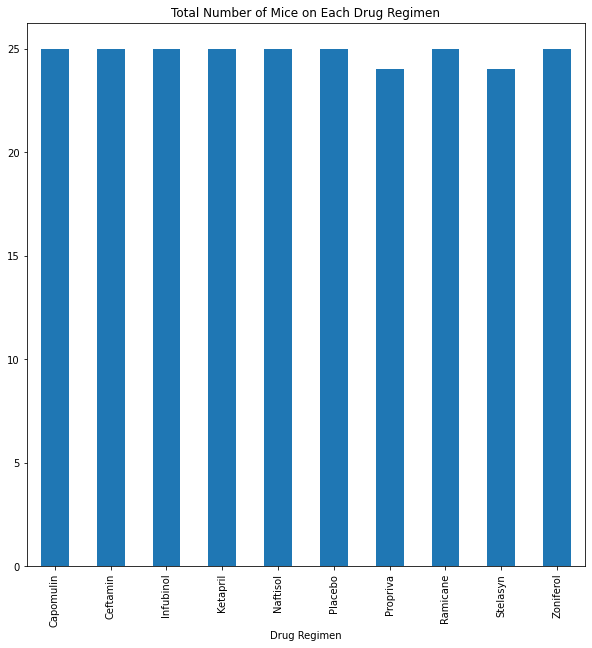

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
MouseID= drug_regimen['Mouse ID'].nunique()
MouseID.plot(kind='bar', figsize=(10,10))
plt.title("Total Number of Mice on Each Drug Regimen")
plt.show()

Text(0, 0.5, 'Number of Mice')

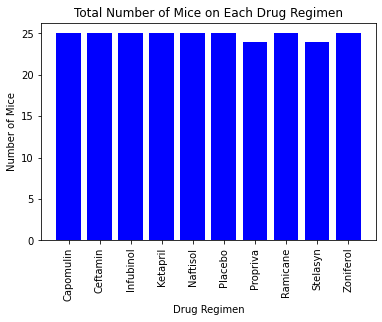

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis =range(merged_clean["Drug Regimen"].nunique())
y_axis =MouseID                 
plt.bar(x_axis, y_axis, color="b", align="center")

plt.title("Total Number of Mice on Each Drug Regimen")

drugs =sorted(merged_clean["Drug Regimen"].unique())

    
plt.xticks(x_axis, drugs, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


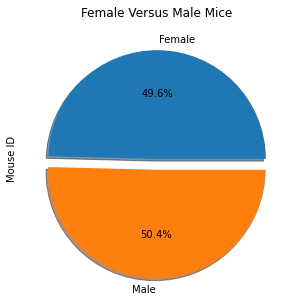

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = merged_clean.groupby("Sex")
MouseID = sex['Mouse ID'].nunique()
explode = (0,0.1)


MouseID.plot.pie(figsize=(5,5), explode=explode, shadow=True, autopct='%1.1f%%')
plt.title("Female Versus Male Mice")
plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

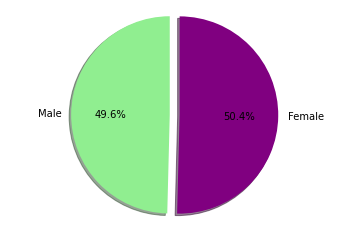

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
explode = (0,0.1)
colors = ['lightgreen', 'purple']
plt.pie(MouseID, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# mouse_perdrug
maxtimepoint=merged_clean.groupby('Mouse ID').agg({'Timepoint':"max"})
maxtimepoint
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedmax =pd.merge(merged_clean, maxtimepoint, on=["Timepoint","Mouse ID"])
mergedmax
max4drugs = mergedmax.loc[(mergedmax["Drug Regimen"] == 'Capomulin')|(mergedmax["Drug Regimen"] == 'Ramicane')|
                         (mergedmax["Drug Regimen"] == 'Infubinol')|(mergedmax["Drug Regimen"] == 'Ceftamin'),:]
max4drugs                         

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = max4drugs['Drug Regimen'].unique()
# Create empty list to fill with tumor vol data (for plotting)
final_volume =[]

lowerq_list = []
upperq_list = []
iqr_list = []
lower_bound_list = []
upper_bound_list = []



for drug in treatments:
    treatment_df = max4drugs.loc[max4drugs['Drug Regimen'] == drug] 
    final_volume.append(treatment_df['Tumor Volume (mm3)'])
    quartiles = treatment_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


    lowerq_list.append(lowerq)
    upperq_list.append(upperq)
    iqr_list.append(iqr)
    lower_bound_list.append(lower_bound)
    upper_bound_list.append(upper_bound)


quartiles_df = pd.DataFrame({'Treatment': treatments,
                            'lowerq': lowerq_list,
                            'upperq' : upperq_list,
                            'IQR': iqr_list,
                            'lower Bound': lower_bound_list,'upper Bound': upper_bound_list})




print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
quartiles_df    

The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Treatment,lowerq,upperq,IQR,lower Bound,upper Bound
0,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811
1,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458


<function matplotlib.pyplot.show(*args, **kw)>

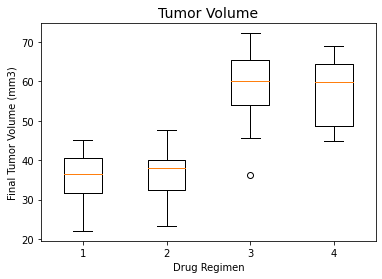

In [30]:
plt.boxplot(final_volume)
plt.title('Tumor Volume',fontsize =14)
plt.ylabel('Final Tumor Volume (mm3)',fontsize = 10)
plt.xlabel('Drug Regimen',fontsize = 10)
plt.show

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

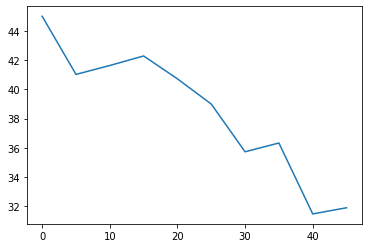

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomum
mouse_id = 'y793'
mouse_reg = 'Capomulin'
tumor_time_df = merged_clean.loc[merged_clean['Mouse ID']== mouse_id]
plt.plot(tumor_time_df['Timepoint'], tumor_time_df['Tumor Volume (mm3)'])


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

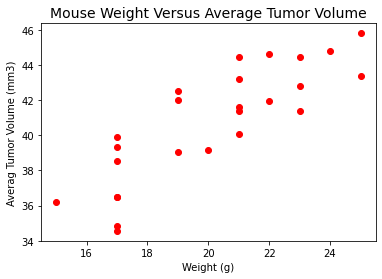

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#average_tumor_weight = merged_clean.groupby('Tumor Volume (mm3)')[]
capomulin_mice = merged_clean.loc[(merged_clean["Drug Regimen"] == 'Capomulin'),:]
average_capo= capomulin_mice.groupby('Mouse ID').mean()

#tumor_time_df = merged_clean.loc[merged_clean['Mouse ID']== mouse_id]
plt.scatter(average_capo['Weight (g)'], average_capo['Tumor Volume (mm3)'], marker="o", facecolors='red')
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =14)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_capo['Weight (g)'], average_capo['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


<function matplotlib.pyplot.show(*args, **kw)>

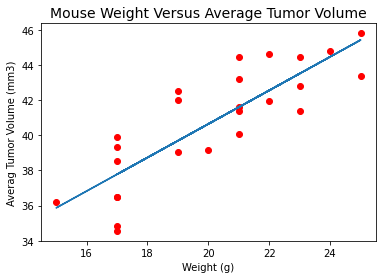

In [23]:
plt.scatter(average_capo['Weight (g)'], average_capo['Tumor Volume (mm3)'], marker="o", facecolors='red')

x_values = average_capo['Weight (g)']
y_values = average_capo['Tumor Volume (mm3)']

(slope, intercept, rvalues, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values *slope +intercept

plt.plot(x_values, regress_values)
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =14)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =10)
plt.show